In [78]:
from scipy.fft import fft, fft2, ifft2
import matplotlib.pyplot as plt
import scipy
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import math
from math import e, log
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [79]:
max_l = 100
l = 0
Pr_er = 10**(-3)
sigma = 0.8
H = np.array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
             [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], 
             [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
             [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
             [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]])

In [80]:
d_c = 6

In [81]:
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [82]:
def phi(x):
    return -np.log(np.tanh(x / 2))

In [83]:
def normal(x, mu, sigma):
    return np.exp(-pow(mu - x, 2)/(2 * pow(sigma, 2))) / (sigma * np.sqrt(2*np.pi))

In [84]:
esult = integrate.quad(lambda x: normal(x, 2/(sigma**2), 4/(sigma ** 2)), 2/(sigma**2) - 3 * 2/(sigma), 2/(sigma**2) + 3 * 2/(sigma))

In [85]:
def y(sigma, Pr_er):
    l = 2/(sigma**2) - 3 * 2/sigma
    r = 3 * 2/sigma + 2/(sigma**2)
    step = (r - l) * Pr_er
    ans = []
    for i in range(int(1/Pr_er) + 1):
        ans.append(l)
        l += step
    return ans

In [86]:
def generate_density(sigma, Pr_er):
    l = 2/(sigma**2) - 3 * 2/sigma
    r = 3 * 2/(sigma) + 2/(sigma**2)
    step = (r - l) * Pr_er
    ans = []
    for i in range(int(1/Pr_er) + 1):
        ans.append(normal(l, 2/(sigma**2), 4/(sigma ** 2)))
        l += step
    return ans

In [87]:
p_v = generate_density(sigma, Pr_er)

In [88]:
y_arr = y(sigma, Pr_er)

In [89]:
p_v = np.array(p_v)
p_v = p_v / p_v.sum()

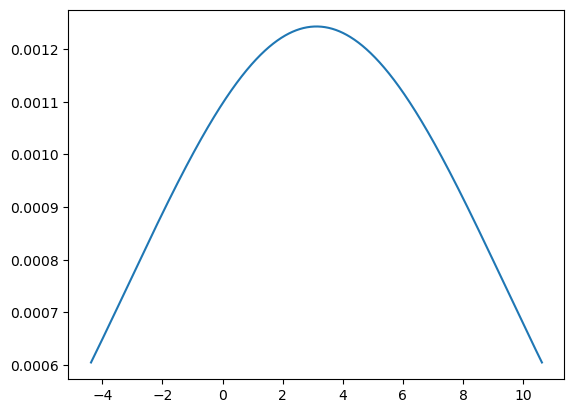

In [90]:
plt.plot(y_arr, p_v)

In [91]:
def m_i(y_arr):
    ans = np.zeros(shape=(len(y_arr), 2))
    for i in range(len(p_v)):
        if y_arr[i] > 0:
            ans[i] = [0, abs(y_arr[i])]
        else:
            ans[i] = [1, abs(y_arr[i])]
    return ans

In [92]:
m_i = m_i(y_arr)

In [93]:
def z_compute(m):
    z_i = np.zeros(shape=(len(m), 2))
    for i in range(len(m)):
        z_i[i] = [m[i, 0], phi(m[i, 1])]
    return z_i

In [100]:
def p_func_v(y_arr, p_v):
    return dict(zip(y_arr, p_v))

In [101]:
p_func_v = p_func_v(y_arr, p_v)

In [94]:
z = np.array(z_compute(m_i))

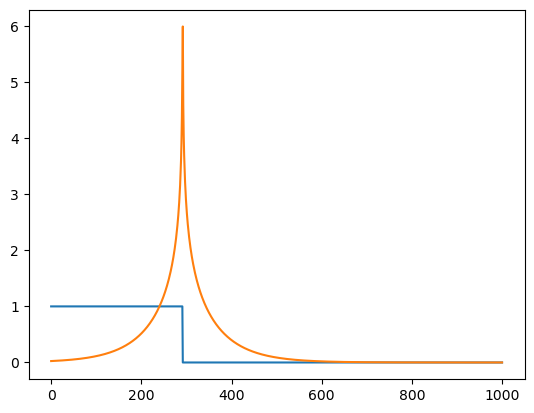

In [95]:
plt.plot(z)

In [96]:
def density_z(z, y_arr):
    ans = np.zeros(shape=(2, len(y_arr)))
    for i in range(len(z)):
        ans[0, i] = (1/np.sinh(z[i, 1])) * p_func_v[y_arr[i]]
        ans[1, i] = (1/np.sinh(z[i, 1])) * p_func_v[y_arr[i]]
    return ans

In [97]:
p_z = density_z(z, y_arr)

NameError: name 'p_func_v' is not defined

In [22]:
p_z = p_z / p_z.sum()

In [ ]:
def w_compute(z):
    

In [29]:
def density_w(p_z):
    return scipy.fft.ifft2(scipy.fft.fft2(p_z) ** (d_c - 1)).real

In [30]:
density_w = density_w(p_z)

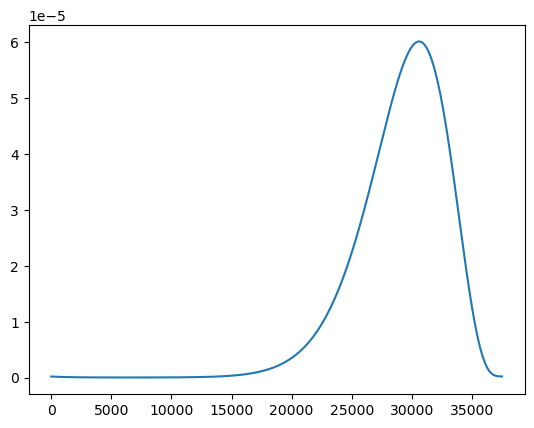

In [42]:
plt.plot(density_w[0])

In [53]:
def p_c(w):
    ans = np.zeros(shape=(len(w), 2))
    for i in range(len(w)):
        if (w[i, 0] == 0):
            ans[i] = [0, phi(w[i, ])]
        else:
            ans[i] = [1, phi(-w[i, 1])]
    return ans

In [113]:
c_dist = p_c(w)

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_1218/897705512.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ans[i] = [0, phi(w[i, 1])]


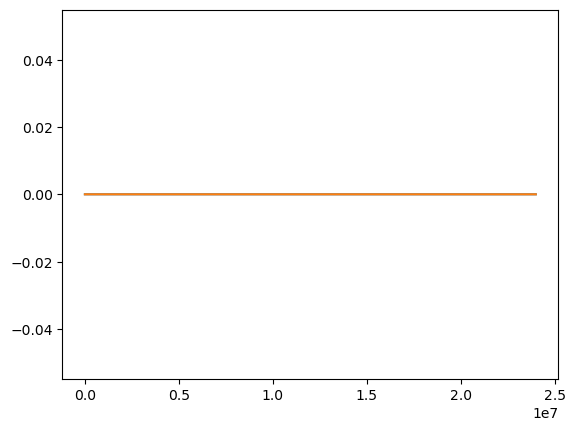

In [115]:
plt.plot(c_dist)

In [ ]:
def p_v_update(p_v, c_dist):
    

In [11]:
def stop_kritetia():
    result = integrate.quad(lambda x: p_v(x), -inf, 0)
    return (result < Pr_er)

In [ ]:
while True:
    z = []
    w = [0, 0]
    if (l == 1):
        z_compute()
        w_compute()
        
        p_c_update()
        
    if stop_kritetia()
    return l

In [11]:
s = input()
s_ = ''
for i in range(len(s)):
    if s[i].isalpha():
        s_[i] = chr(ord(s[i]) + 1)
print(s_)

Veni, vidi, vici


TypeError: 'str' object does not support item assignment